Udacity Machine Learning Engineer Nanodegree Project 5 
=============

Deep Learning for Satellite Image Recognition
-------------


In [2]:
# Modules to import for project
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import numpy as np
import os
import sys
import tarfile
import scipy.io as sio
import random
import pandas as pd
import h5py
from numpy import random
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from PIL import Image
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
#Load data generated from cnn_1.py
h5f = h5py.File('cnn_1_data.h5','r')

cnn_loss = h5f['cnn_loss'][:]
cnn_step = h5f['cnn_step'][:]
cnn_1_cm = h5f['cnn_1_cm'][:]


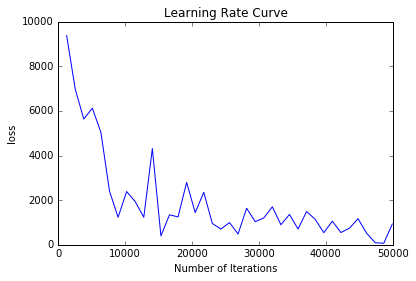

In [4]:
steps = np.arange(0,50000,10)

plt.plot(cnn_step, cnn_loss)
axes = plt.gca()
plt.ylabel('loss')
plt.xlabel('Number of Iterations')
plt.title('Learning Rate Curve')
blue_patch = mpatches.Patch(color='blue')
plt.show()

Confusion matrix, without normalization
[[ 224    0    0    2    9    0]
 [   0 1059    1   46    0    0]
 [   0    2  841   22    0    0]
 [   0   27   20  736    1    1]
 [  11    0    0    1   94   12]
 [   0    0    0    0    0 1891]]
Normalized confusion matrix
[[  9.53e-01   0.00e+00   0.00e+00   8.51e-03   3.83e-02   0.00e+00]
 [  0.00e+00   9.58e-01   9.04e-04   4.16e-02   0.00e+00   0.00e+00]
 [  0.00e+00   2.31e-03   9.72e-01   2.54e-02   0.00e+00   0.00e+00]
 [  0.00e+00   3.44e-02   2.55e-02   9.38e-01   1.27e-03   1.27e-03]
 [  9.32e-02   0.00e+00   0.00e+00   8.47e-03   7.97e-01   1.02e-01]
 [  0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   1.00e+00]]


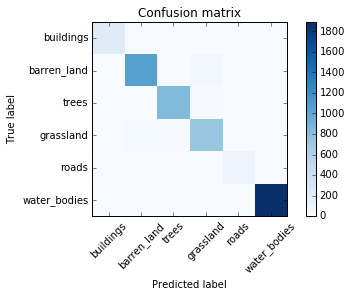

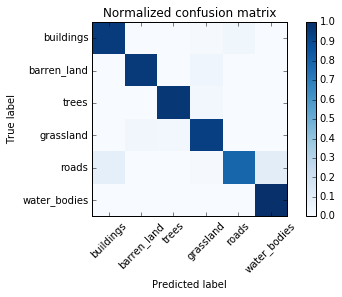

In [5]:
land_cover = ['buildings', 'barren_land', 'trees', 'grassland', 'roads', 'water_bodies']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(land_cover))
    plt.xticks(tick_marks, land_cover, rotation=45)
    plt.yticks(tick_marks, land_cover)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cnn_1_cm)
plt.figure()
plot_confusion_matrix(cnn_1_cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cnn_1_cm.astype('float') / cnn_1_cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

Now let's try using the data from our second cnn model.

In [92]:
#Load data generated from cnn_2.py
h5f = h5py.File('cnn_2_data.h5','r')

cnn_2_loss = h5f['cnn_2_loss'][:]
cnn_2_step = h5f['cnn_2_step'][:]
cnn_2_cm = h5f['cnn_2_cm'][:]


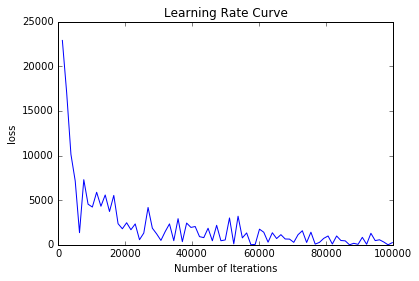

In [93]:
steps = np.arange(0,50000,10)

plt.plot(cnn_2_step, cnn_2_loss)
axes = plt.gca()
plt.ylabel('loss')
plt.xlabel('Number of Iterations')
plt.title('Learning Rate Curve')
blue_patch = mpatches.Patch(color='blue')
plt.show()

Confusion matrix, without normalization
[[ 224    0    0    0    9    0]
 [   0 1050    1   32    0    1]
 [   0    2  859   11    0    0]
 [   0   38   31  687    2    4]
 [  13    0    2    0  101    7]
 [   0    0    0    0    0 1926]]
Normalized confusion matrix
[[  9.61e-01   0.00e+00   0.00e+00   0.00e+00   3.86e-02   0.00e+00]
 [  0.00e+00   9.69e-01   9.23e-04   2.95e-02   0.00e+00   9.23e-04]
 [  0.00e+00   2.29e-03   9.85e-01   1.26e-02   0.00e+00   0.00e+00]
 [  0.00e+00   4.99e-02   4.07e-02   9.02e-01   2.62e-03   5.25e-03]
 [  1.06e-01   0.00e+00   1.63e-02   0.00e+00   8.21e-01   5.69e-02]
 [  0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   1.00e+00]]


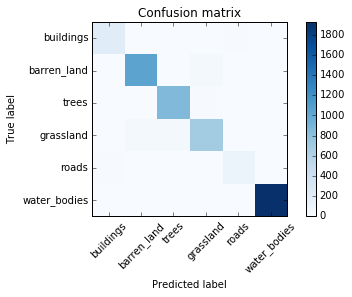

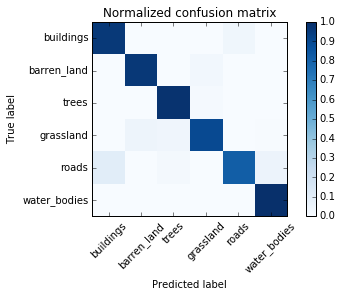

In [94]:
land_cover = ['buildings', 'barren_land', 'trees', 'grassland', 'roads', 'water_bodies']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(land_cover))
    plt.xticks(tick_marks, land_cover, rotation=45)
    plt.yticks(tick_marks, land_cover)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cnn_2_cm)
plt.figure()
plot_confusion_matrix(cnn_2_cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cnn_2_cm.astype('float') / cnn_2_cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [88]:
#Load data generated from cnn_3.py
h5f = h5py.File('cnn_3_data.h5','r')

cnn_3_loss = h5f['cnn_3_loss'][:]
cnn_3_step = h5f['cnn_3_step'][:]
cnn_3_cm = h5f['cnn_3_cm'][:]
#steps_3 = h5f['steps_3'][:]

In [89]:
cnn_3_step

array([   2560.,    5120.,    7680.,   10240.,   12800.,   15360.,
         17920.,   20480.,   23040.,   25600.,   28160.,   30720.,
         33280.,   35840.,   38400.,   40960.,   43520.,   46080.,
         48640.,   51200.,   53760.,   56320.,   58880.,   61440.,
         64000.,   66560.,   69120.,   71680.,   74240.,   76800.,
         79360.,   81920.,   84480.,   87040.,   89600.,   92160.,
         94720.,   97280.,   99840.,  102400.,  104960.,  107520.,
        110080.,  112640.,  115200.,  117760.,  120320.,  122880.,
        125440.,  128000.,  130560.,  133120.,  135680.,  138240.,
        140800.,  143360.,  145920.,  148480.])

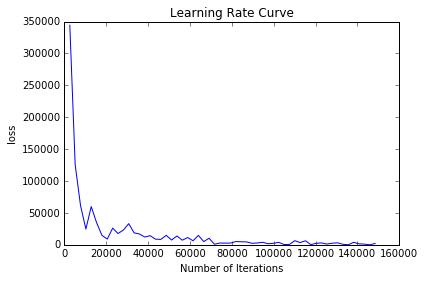

In [90]:
steps = np.arange(0,300000,10)

plt.plot(cnn_3_step, cnn_3_loss)
axes = plt.gca()
plt.ylabel('loss')
plt.xlabel('Number of Iterations')
plt.title('Learning Rate Curve')
blue_patch = mpatches.Patch(color='blue')
plt.show()

Confusion matrix, without normalization
[[ 231    1    0    0    1    0]
 [   0 1064    1   18    0    1]
 [   0    0  867    5    0    0]
 [   0   32   58  671    1    0]
 [  19    0    2    0   96    6]
 [   0    0    0    0    0 1926]]
Normalized confusion matrix
[[  9.91e-01   4.29e-03   0.00e+00   0.00e+00   4.29e-03   0.00e+00]
 [  0.00e+00   9.82e-01   9.23e-04   1.66e-02   0.00e+00   9.23e-04]
 [  0.00e+00   0.00e+00   9.94e-01   5.73e-03   0.00e+00   0.00e+00]
 [  0.00e+00   4.20e-02   7.61e-02   8.81e-01   1.31e-03   0.00e+00]
 [  1.54e-01   0.00e+00   1.63e-02   0.00e+00   7.80e-01   4.88e-02]
 [  0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   1.00e+00]]


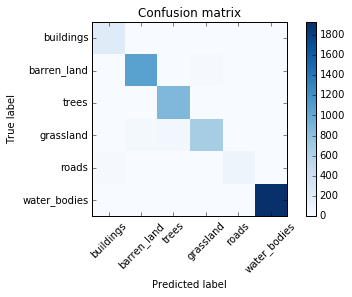

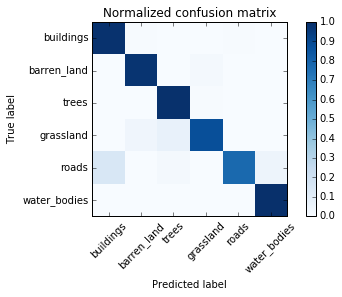

In [91]:
land_cover = ['buildings', 'barren_land', 'trees', 'grassland', 'roads', 'water_bodies']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(land_cover))
    plt.xticks(tick_marks, land_cover, rotation=45)
    plt.yticks(tick_marks, land_cover)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cnn_3_cm)
plt.figure()
plot_confusion_matrix(cnn_3_cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cnn_3_cm.astype('float') / cnn_3_cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()